In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# read data from excel file 
df = pd.read_excel('../28052024_Sqrt_Norm_Table.xlsx', sheet_name='Sheet1')

# Select the specified columns and set 'Subject' as the index
CE = ['MeanEntI', 'Subject', 'FirstRTMT', 'FirstRT', 'First_Average_duration_of_whole_fixations_BreakSidePercentage', 'First_Duration_of_first_whole_fixation_BreakSidePercentage']
SCE = ['MeanEntI', 'Subject', 'FirstMinusLatterRTMT', 'FirstMinusLatterRT', 'ET11', 'ET43']

df_selected = df[CE].set_index('Subject')

df_selected = df_selected.rename(columns={
    f'{CE[2]}': 'Total Time (ms)',
    f'{CE[3]}': 'Planning Time (ms)',
    f'{CE[4]}': ' Avg. Fixation',
    f'{CE[5]}': 'First Fixation',
})

# Display the first few rows of the resulting DataFrame
df_selected.head(11)


,MeanEntI,Total Time (ms),Planning Time (ms),Avg. Fixation,First Fixation
Subject,,,,,
1,3.333333,1127,737,0.454031,0.853750
3,4.000000,1780,1363,0.587912,0.512987
4,6.000000,1363,987,0.620493,0.766000
5,3.000000,1515,903,0.454733,0.318878
8,3.000000,1641,1403,0.490909,0.355000
12,2.000000,1058,835,0.309558,0.594156
15,5.666667,1668,1334,0.542012,0.678519
17,4.833333,1245,820,1.000000,1.000000
18,2.833333,1294,946,0.305996,0.197488


In [215]:
# Suponiendo que df_selected ya está definido y contiene los datos relevantes
mean_ent_i = df_selected['MeanEntI'].mean()
df_selected['MeanEntI_Category'] = df_selected['MeanEntI'].apply(lambda x: 'High' if x > mean_ent_i else 'Low')

high_meanent_i_subjects = df_selected[df_selected['MeanEntI_Category'] == 'High']
low_meanent_i_subjects = df_selected[df_selected['MeanEntI_Category'] == 'Low']

# Seleccionar solo las columnas numéricas
numeric_columns = df_selected.select_dtypes(include=[np.number]).columns

high_mean = high_meanent_i_subjects[numeric_columns].mean()[1:]
low_mean = low_meanent_i_subjects[numeric_columns].mean()[1:]
high_std = high_meanent_i_subjects[numeric_columns].std()[1:]
low_std = low_meanent_i_subjects[numeric_columns].std()[1:]

high_mean, high_std

(Total Time (ms)       1572.750000
 Planning Time (ms)    1172.400000
  Avg. Fixation           0.466719
 First Fixation           0.476624
 dtype: float64,
 Total Time (ms)       798.973149
 Planning Time (ms)    751.761188
  Avg. Fixation          0.197079
 First Fixation          0.224850
 dtype: float64)

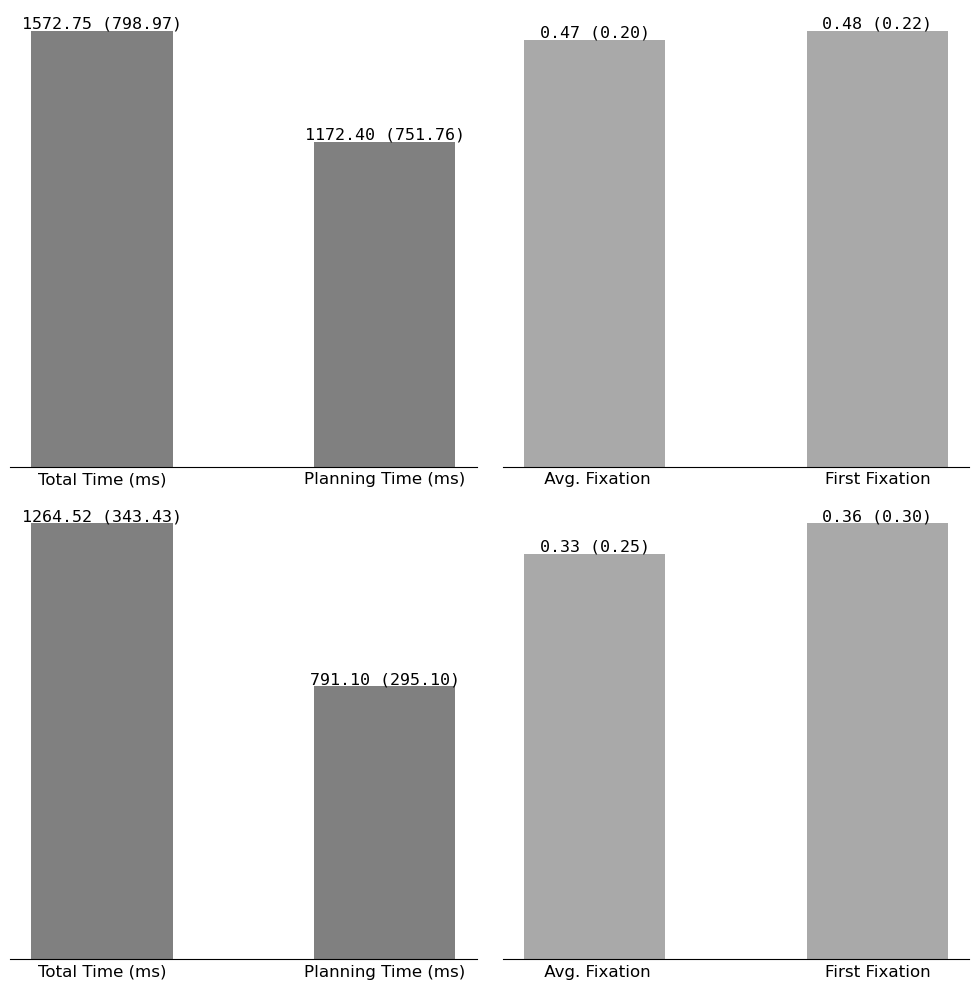

In [216]:
# Function to wrap text for long labels with bold formatting
def wrap_labels_bold(ax, width):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        if len(text) > width:
            text = text[:width] + "\n" + text[width:]
        labels.append(f'{text}')
    ax.set_xticklabels(labels, rotation=0, fontsize=12, fontweight='bold')

# Plotting with specified adjustments and increased label sizes
ig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Width of the bars
bar_width = 0.5

# High MeanEntI Group - Total and Planning time
axs[0, 0].bar(high_mean.index[:2], high_mean[:2], color=['grey', 'grey'], edgecolor='none', width=bar_width)
for i, v in enumerate(high_mean[:2]):
    axs[0, 0].text(i, v, f'{v:.2f} ({high_std[i]:.2f})', ha='center', va='bottom', fontsize=12, fontfamily='monospace')

# High MeanEntI Group - Fixation Durations
axs[0, 1].bar(high_mean.index[2:], high_mean[2:], color=['darkgrey', 'darkgrey'], edgecolor='none', width=bar_width)
for i, v in enumerate(high_mean[2:]):
    axs[0, 1].text(i, v, f'{v:.2f} ({high_std[i+2]:.2f})', ha='center', va='bottom', fontsize=12, fontfamily='monospace')

# Low MeanEntI Group - Total and Planning time
axs[1, 0].bar(low_mean.index[:2], low_mean[:2], color=['grey', 'grey'], edgecolor='none', width=bar_width)
for i, v in enumerate(low_mean[:2]):
    axs[1, 0].text(i, v, f'{v:.2f} ({low_std[i]:.2f})', ha='center', va='bottom', fontsize=12, fontfamily='monospace')

# Low MeanEntI Group - Fixation Durations
axs[1, 1].bar(low_mean.index[2:], low_mean[2:], color=['darkgrey', 'darkgrey'], edgecolor='none', width=bar_width)
for i, v in enumerate(low_mean[2:]):
    axs[1, 1].text(i, v, f'{v:.2f} ({low_std[i+2]:.2f})', ha='center', va='bottom', fontsize=12, fontfamily='monospace')

# Remove titles, y-axis labels, and ticks
for ax in axs.flat:
    ax.set_yticks([])
    ax.yaxis.set_visible(False)
    ax.set_title('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Remove the small tick line on the x-axis
    ax.tick_params(axis='x', length=0, labelsize=12)

plt.tight_layout()
# plt.savefig('HighLowIntention.pdf', format='pdf')
plt.show()



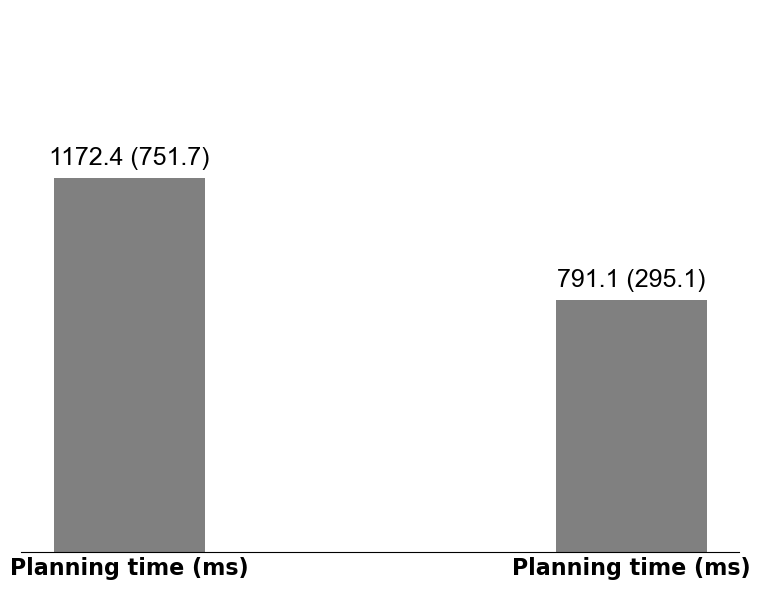

In [228]:
fig, ax = plt.subplots(figsize=(8, 6))

# Datos de los gráficos
values = [1172.4, 791.1]
errors = [751.7, 295.1]
labels = ['Primer gráfico', 'Segundo gráfico']

# Crear gráfico de barras
bars = ax.bar(labels, values, color='grey', width=0.3) # #BFBFBF

# Ajustes del gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='x', length=0, labelsize=18)
ax.set_ylim(0, 1700)
ax.set_yticks([])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Planning time (ms)', 'Planning time (ms)'], fontsize=16, fontweight='bold')
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(width=0.5)
ax.yaxis.set_visible(False)

# Mostrar valores en la parte superior de las barras sin ceros a la izquierda
for i, bar in enumerate(bars):
    yval = bar.get_height()
    yval_str = str(round(yval, 2)).lstrip('0') if yval < 1 else str(round(yval, 2))
    error_str = str(errors[i]).lstrip('0') if errors[i] < 1 else str(errors[i])
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval + 25, f"{yval_str} ({error_str})", va='bottom', ha='center', fontsize=18, fontfamily='Arial')

plt.tight_layout()
plt.savefig('CE_ET_PT.pdf', format='pdf')
plt.show()


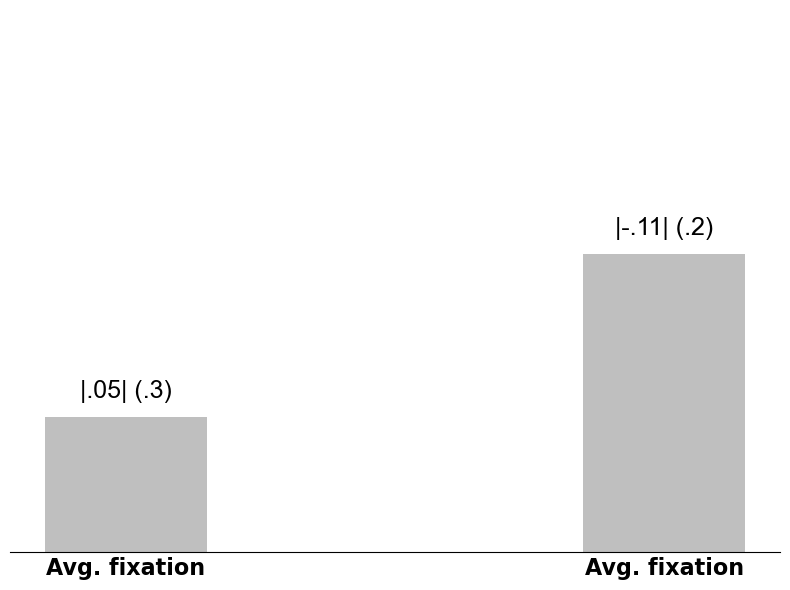

In [203]:
import matplotlib.pyplot as plt

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Datos de los gráficos
values = [.05, -.11]
errors = [.3, .2]
labels = ['Primer gráfico', 'Segundo gráfico']

# Crear gráfico de barras con valores absolutos
bars = ax.bar(labels, [abs(v) for v in values], color='#BFBFBF', width=0.3)  # Color gris #BFBFBF

# Ajustes del gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='x', length=0, labelsize=18)
ax.set_ylim(0, 0.2)
ax.set_yticks([])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Avg. fixation', 'Avg. fixation'], fontsize=16, fontweight='bold')
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(width=0.5)
ax.yaxis.set_visible(False)

# Mostrar valores en la parte superior de las barras sin ceros antes del punto decimal
for i, bar in enumerate(bars):
    yval = values[i]  # Valor original
    yval_str = f"|{'-' if yval < 0 else ''}{str(abs(round(yval, 2))).lstrip('0')}|"
    error_str = f"{str(errors[i]).lstrip('0')}" if errors[i] < 1 else str(errors[i])
    ax.text(bar.get_x() + bar.get_width() / 2.0, abs(yval) +.005, f"{yval_str} ({error_str})", 
            va='bottom', ha='center', fontsize=18, fontfamily='Arial')

plt.tight_layout()
plt.savefig('SCE_ET_AVG.pdf', format='pdf')
plt.show()


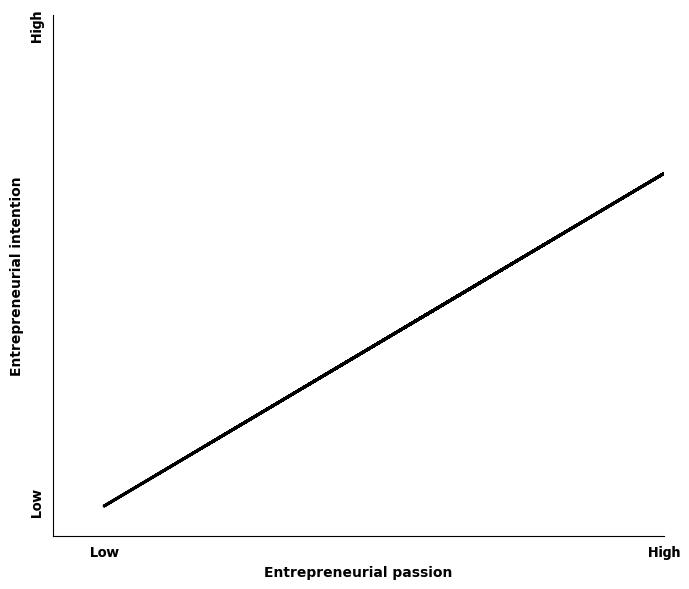

In [35]:
X = df_selected['MeanEntPassion'].values.reshape(-1, 1)
y = df_selected['MeanEntI'].values

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predicciones
y_pred = model.predict(X)

# Crear la gráfica
plt.figure(figsize=(7, 6))
plt.scatter(X, y, color='gray', alpha=0.5)
plt.plot(X, y_pred, color='black', linewidth=2)
plt.ylim(1, 7) # rango del cuestionario para intention
plt.xlim(1, 7) # rango del cuestionario para passion

plt.xticks([1.5, 7], ['Low', 'High'], fontweight='bold', fontname='Tahoma')
plt.yticks([1.5, 7], ['Low', 'High'], fontweight='bold', rotation=90, fontname='Tahoma')

plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=False, right=False)

# Etiquetas y títulos
plt.xlabel('Entrepreneurial passion', fontweight='bold') # Average/First fixation duration on the opportunity side 
plt.ylabel('Entrepreneurial intention', fontweight='bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

plt.grid(False)
plt.tight_layout()
plt.savefig('MeanEntIvsMeanEntP.pdf', format='pdf')

# Mostrar la gráfica
plt.show()